<h1>Data pemrosesan data</h1>
<hr>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

Melihat ukuran dan nama kelas 

In [2]:
data = tf.keras.utils.image_dataset_from_directory('BananaLSD\AugmentedSet')
# Get the class names
class_names = data.class_names
# Print the class names
print(class_names)
len(data)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\user\AppData\Local\Temp\ipykernel_5660\827513544.py:1: SyntaxWarning: invalid escape sequence '\A'
  data = tf.keras.utils.image_dataset_from_directory('BananaLSD\AugmentedSet')


Found 1600 files belonging to 4 classes.
['cordana', 'healthy', 'pestalotiopsis', 'sigatoka']


50

In [3]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

* 32: memproses 32 gambar dalam satu batch.

* 256, 256: setiap gambar memiliki tinggi dan lebar 256 piksel.

* 3: Angka 3 umumnya menunjukkan gambar berwarna (RGB: Red, Green, Blue).

<hr>
Ambil simple acak

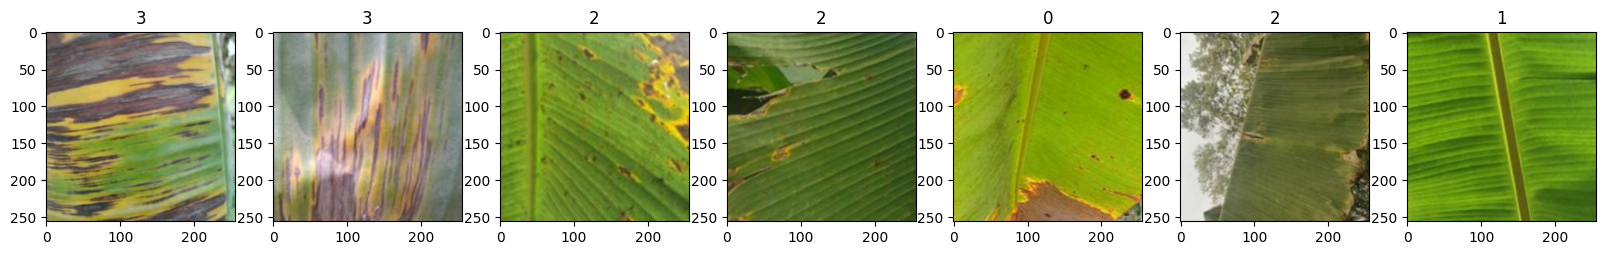

In [4]:
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(str(batch[1][idx]))

<div class="alert alert-block alert-info">
<b>note:</b> 'cordana'= 0, 'healthy'= 1, 'pestalotiopsis'= 2, 'sigatoka'= 3.
</div>

<H2>Normalisasi</H2>

In [5]:
data = data.map(lambda x,y: (x/255, y))

In [6]:
data.as_numpy_iterator().next()

(array([[[[0.68235296, 0.7058824 , 0.4627451 ],
          [0.6791667 , 0.7026961 , 0.4595588 ],
          [0.6757353 , 0.6938726 , 0.45343137],
          ...,
          [0.36862746, 0.40784314, 0.16078432],
          [0.36862746, 0.40784314, 0.16078432],
          [0.36862746, 0.40784314, 0.16078432]],
 
         [[0.7014706 , 0.725     , 0.48186275],
          [0.6982843 , 0.72181374, 0.47867647],
          [0.69485295, 0.7129902 , 0.47254902],
          ...,
          [0.3622549 , 0.4014706 , 0.15441176],
          [0.3622549 , 0.4014706 , 0.15441176],
          [0.3622549 , 0.4014706 , 0.15441176]],
 
         [[0.7085784 , 0.7321078 , 0.48357844],
          [0.7075827 , 0.7311121 , 0.48258272],
          [0.7065104 , 0.7265012 , 0.47881433],
          ...,
          [0.35808823, 0.3973039 , 0.1502451 ],
          [0.35808823, 0.3973039 , 0.1502451 ],
          [0.35808823, 0.3973039 , 0.1502451 ]],
 
         ...,
 
         [[0.46372548, 0.4990196 , 0.23627451],
          [0.45954

<h2>SPLIT DATA TRAIN VAL TEST</h2>

In [7]:
len(data)

50

In [8]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [9]:
train_size+val_size+test_size

52

In [10]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [11]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

<h1>Modeling dengan CNN

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [13]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,710,308 (14.15 MB)

 Trainable params: 3,710,308 (14.15 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
hist = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 30s 836ms/step - accuracy: 0.5098 - loss: 1.1162 - val_accuracy: 0.5710 - val_loss: 0.9840
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 757ms/step - accuracy: 0.6059 - loss: 0.9595 - val_accuracy: 0.6989 - val_loss: 0.8435
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 758ms/step - accuracy: 0.7132 - loss: 0.7420 - val_accuracy: 0.7983 - val_loss: 0.5547
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 30s 843ms/step - accuracy: 0.8093 - loss: 0.4965 - val_accuracy: 0.7358 - val_loss: 0.5772
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 31s 885ms/step - accuracy: 0.8193 - loss: 0.4700 - val_accuracy: 0.8267 - val_loss: 0.4500
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 31s 875ms/step - accuracy: 0.8919 - loss: 0.3283 - val_accuracy: 0.8267 - val_loss: 0.4472
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 30s 858ms/step - accuracy: 0.8924 - loss: 0.3432 - val_accuracy: 0.8438 - val_loss: 0.5934
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 801ms/step - accuracy: 0.9172 - loss: 0.2943 - val_accu

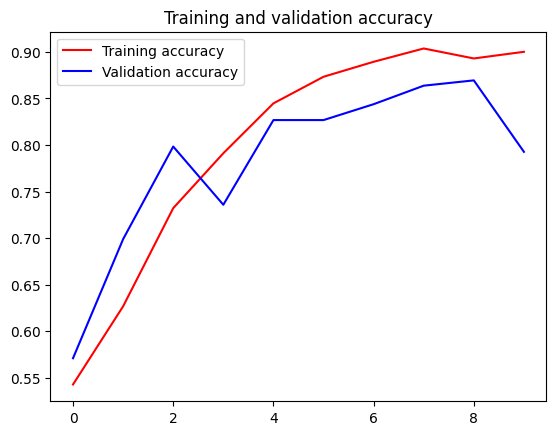

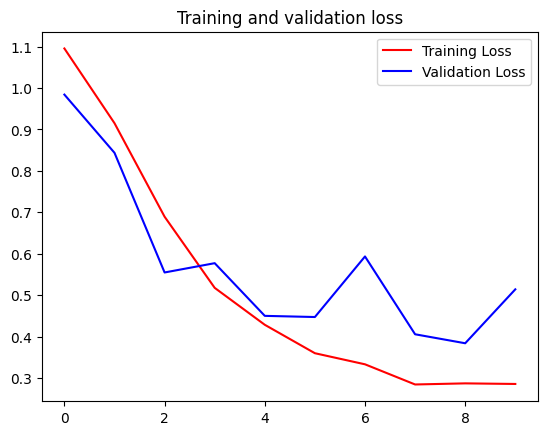

In [20]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<h1>TEST THE MODEL WITH INPUT IMAGE

In [35]:
import cv2
import matplotlib 
import skimage.io

In [36]:
img_link = cv2.imread(r'BananaLSD\OriginalSet\pestalotiopsis\4.jpeg')

img = skimage.io.imread(img_link)
cv2.imwrite(img_link, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

plt.imshow(img)
plt.show()

OSError: Cannot understand given URI: array([[[249, 250, 248],
        [249, 250, 248],
       ....

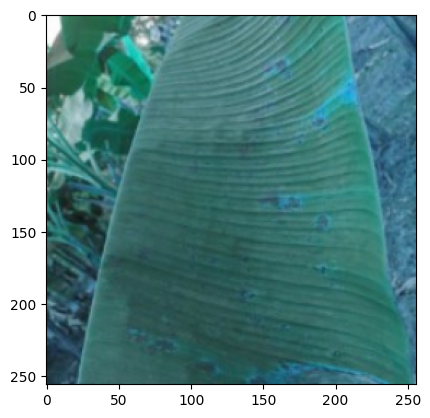

In [32]:
import numpy as np
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [33]:
import numpy as np

# Assuming `resize` is the image you want to predict
# Assuming `class_names` is the list of class names

# Preprocess the image
resized_image = resize / 255.0
input_image = np.expand_dims(resized_image, axis=0)

# Make predictions
yhat = model.predict(input_image)

# Get the predicted class index
predicted_class_index = np.argmax(yhat, axis=1)

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index[0]]

# Get the class probabilities
class_probabilities = yhat[0]

# Print the predicted class and probabilities
print("Predicted class:", predicted_class_name)
print("Class probabilities:", class_probabilities)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Predicted class: cordana
Class probabilities: [7.5021625e-01 9.4914004e-32 3.8711921e-24 2.4978380e-01]


Visualize CNN Layers